In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.image as mpimg


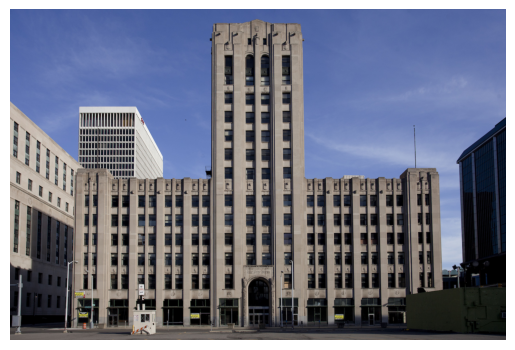

In [57]:
img = mpimg.imread('building2.jpg')
plt.axis('off')
plt.imshow(img)

In [58]:
img = np.array(img)

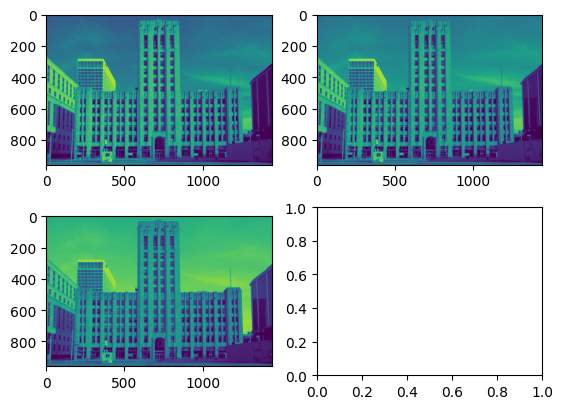

In [59]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(img[:, : , 0])
axs[0, 1].imshow(img[:, : , 1])
axs[1, 0].imshow(img[:, : , 2])

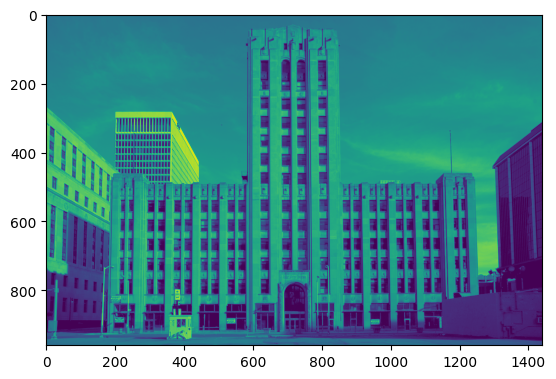

In [67]:
gray = 0.1* img[:, :, 0] + 0.7154 *img[:, :, 1] + 0.0721 *img[:, :, 2]
plt.imshow(gray)
plt.savefig('output.png')


In [68]:
from numpy import linalg as LA 

U, S, V = LA.svd(gray) 

Text(0, 0.5, 'Error')

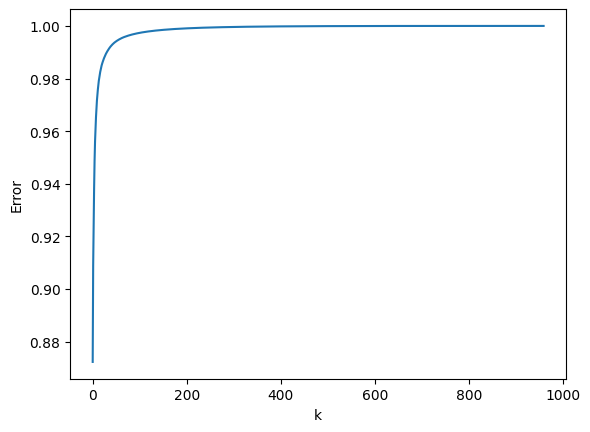

In [71]:
## Compute  Error of image compression of all in situations
a = np.sum(S**2)
b = np.zeros_like(S)
for i in range(S.shape[0]):
    b[i] = np.sum(S[: i + 1]**2, axis=0)/a 
plt.plot(list(range(S.shape[0])), b)
plt.xlabel('k')
plt.ylabel('Error')

In [81]:
def approx_rank_k(U, S, V, k):
    Uk = U[:, : k ]
    Sk = S[: k]
    Vk = V[:k, :]
    '''
    np.diag(Sk): được gọi là ma trận đường chéo và các phân tử Sk ở trên đường chéo chính
    '''
    return np.around(Uk@(np.diag(Sk)).dot(Vk))

In [82]:
alls = []
for k in range(5, 100, 5):
    alls.append(approx_rank_k(U, S, V, k))

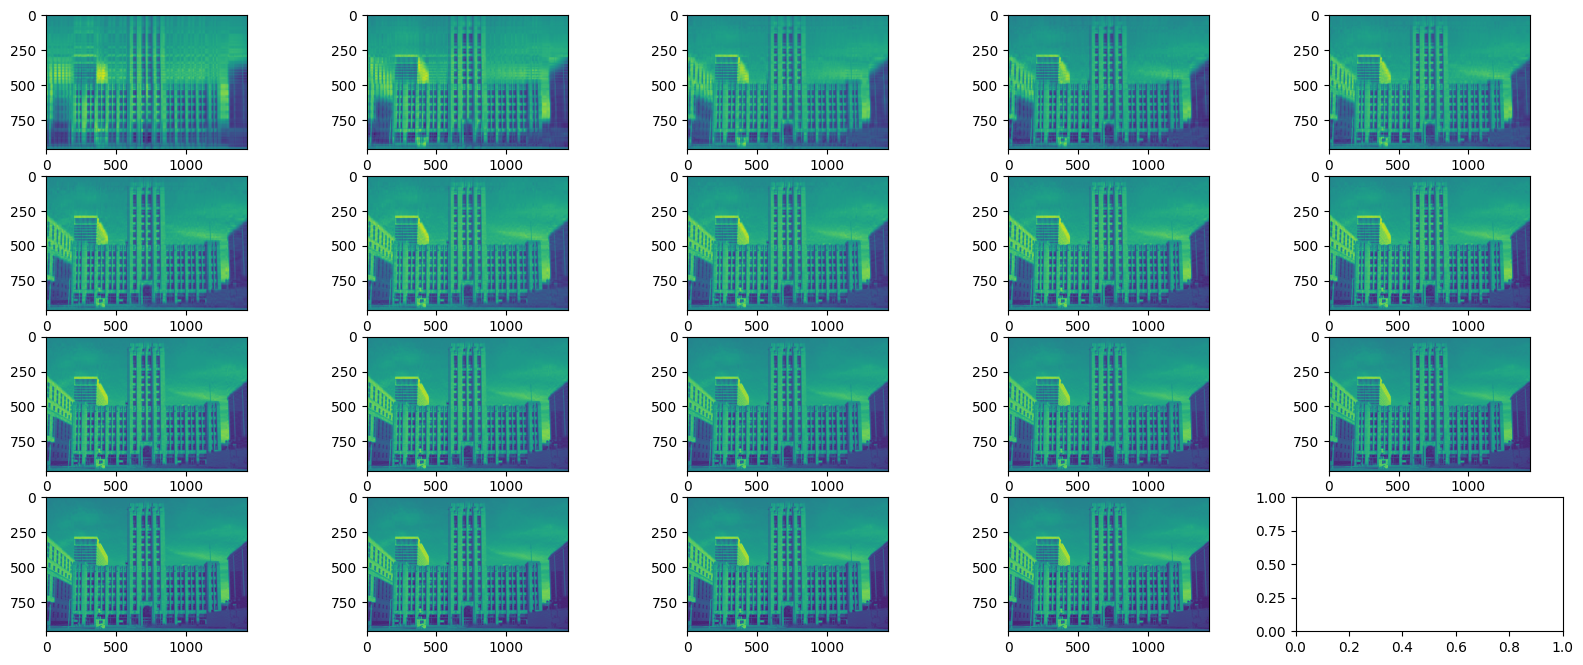

In [89]:
fig, axs = plt.subplots(4, 5, figsize=(20, 8))
axs = axs.flatten()
for i in range(len(axs)-1):
    axs[i].imshow(alls[i])